# Aprovação de Credito com Regressão Logistica
<h3>Author: Leandro S. Silva</h3>
<ul>
    <li>Linkdin: <a>https://www.linkedin.com/in/leandro-soares-11b010115/</a></li>
    <li>Medium:<a></a></li>
    <li></li>

</ul>

<h2> Resumo</h2>
<p> Quando uma instituição financeira vai ceder crédito é necessário uma analise criteriosa para evitar os prejuizos decorrentes de 'maus pagadores', por tanto o sucesso deste tipo de negocio esta pricipalmente em conceder credito para uma maioria de clientes 'bons pagadores' e matendo baixo a o percentual dos maus, assim minimizando prejuizos e maximizando os lucros.</p>

<h2>Base</h2>
<p>Fonte: <a>https://www.kaggle.com/laotse/credit-risk-dataset</a><p>

<p>O Dataset arquivo <b>credit_risk_dataset.csv</b> contém  32.581 fileiras e 12 colunas, sendo que cada fileira representa um cliente. As colunas são as seguintes:</p>

Coluna|	Descrição
-----------|-------------
person_age|	Idade
person_income|	Renda anual
personhomeownership|	Casa própria
personemplength|	Tempo de trabalho(Em Anos)
loan_intent|	Inteção de empréstimo
loan_grade|	Grau do empréstimo
loan_amnt|	Montando do empréstimo
loanintrate|	Interest rate
loan_status|	Status( 0 bom pagador, 1 mau pagador)
loanpercentincome|	Renda percentual
cbpersondefaultonfile|	Padrão histórico
cbpresoncredhistlength|	Período do histórico de crédito

<h2>Índice</h2>
<ol start="0" type=I>
    <li>Import libraries</li>
    <li>Load and info data</li>
    <li>EDA</li>
    <li>Tratamento da Base</li>
    <li>Modeling the data
        <ol type=a>
            <li>Processing categorical columns</li>
            <li>Scaler</li>
            <li>Scaler</li>
            <li>Scaler</li>
            <li>Scaler</li>
        </ol>
    </li>
    <li>Logistic regression</li>
    <li>Tratamento da Base</li>
    <li>Save the models</li>
    <li>Conclusion</li>
</ol>

# 0.  Import libraries.

In [1]:
# Python version

from platform import python_version

print('Python version:', python_version())

Version Python: 3.8.5


In [2]:
# Import libraries

#Data Manipulation
import pandas as pd 
import numpy as np 

# Data Visualization
import seaborn               as sns
import matplotlib.pyplot     as plt
import plotly

#Preprocessing
from imblearn.over_sampling  import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing   import StandardScaler, LabelEncoder, OneHotEncoder

# learn
from sklearn.model_selection import train_test_split
from sklearn.compose         import ColumnTransformer
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, confusion_matrix, classification_report

import pickle #export

# Warnings remove 
import warnings
warnings.filterwarnings("ignore")

# 1. Load and info data

In [3]:
df = pd.read_csv('archive/credit_risk_dataset.csv')

In [4]:
#first 5 rows
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
#last 5 rows
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [6]:
#rows and columns
df.shape

(32581, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [9]:
print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   4011

Unique values :  
 person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64


In [10]:
#identifying blank values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# 2. EDA (exploratory data analysis)

In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


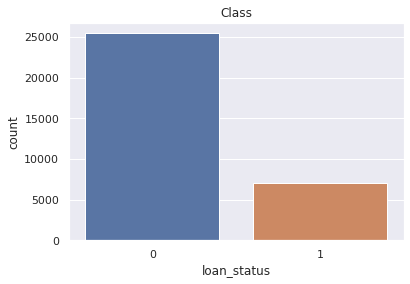

In [12]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="loan_status", data=df).set_title("Class")

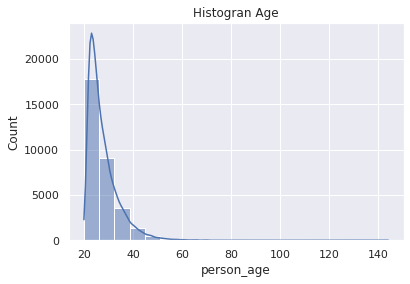

In [13]:
ax = sns.histplot(data=df, x="person_age",bins=20, kde=True).set_title('Histogran Age')

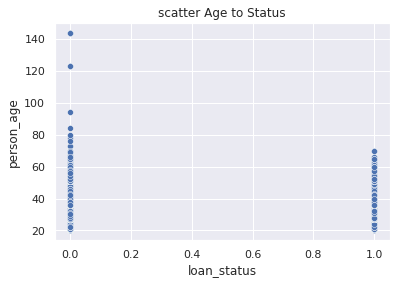

In [14]:
ax = sns.scatterplot(data=df, x="loan_status", y="person_age").set_title('scatter Age to Status')

# 3. Preprocessing

In [15]:
#remove empty data
df.dropna(inplace=True)

In [16]:
#remove duplicate data
df.drop_duplicates(inplace=True)

<p>Como visto na EDA, acima dos 70 anos não temos exemplos de <b>'bons pagadores'</b> portanto irei retirar esses outliers para não inteferir no modelo.</p>

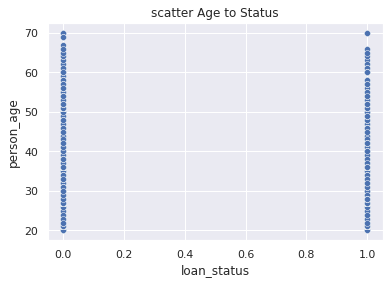

In [17]:
df = df[df['person_age']<=70]
ax = sns.scatterplot(data=df, x="loan_status", y="person_age").set_title('scatter Age to Status')

In [18]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

# 4. Modeling the data

In [19]:
#Predictor columns
x_df = df[['person_age', 
           'person_income', 
           'person_home_ownership',
           'person_emp_length',
           'loan_intent', 
           'loan_grade', 
           'loan_amnt',
           'loan_int_rate', 
           'loan_percent_income',
           'cb_person_default_on_file', 
           'cb_person_cred_hist_length']]

In [20]:
#Target class
y_df = df[['loan_status']]

### 4.1 - Processing categorical columns

In [21]:
#Processing categorical columns
columns =x_df[['person_home_ownership',
           'loan_intent', 
           'loan_grade', 
           'loan_int_rate', 
           'loan_percent_income',
           'cb_person_default_on_file']].columns

label_encoder = LabelEncoder()

for column in columns:
    data_column = label_encoder.fit_transform(x_df[column])
    x_df[f'encoder_{column}'] = data_column

x_df.drop(columns=columns, inplace=True)

### 4.2 Undersampling

In [22]:
#Undersampling
under_sampler = RandomUnderSampler()
x_undersampling, y_undersampling = under_sampler.fit_resample(x_df, y_df)

### 4.3 Oversampling

In [23]:
#Oversampling
smt = SMOTE()
x_oversampling, y_oversampling = smt.fit_resample(x_df, y_df)


### 4.4 One Hot Encoder

In [24]:
#One Hot Encoder

onehotencoder = ColumnTransformer(
    transformers =[('Onehot', 
                    OneHotEncoder(),
                    [5,6,7,8,9,10])],
    remainder='passthrough')
x_df = onehotencoder.fit_transform(x_df).toarray()

#Undersampling_
onehotencoder = ColumnTransformer(
    transformers =[('Onehot', 
                    OneHotEncoder(),
                    [5,6,7,8,9,10])],
    remainder='passthrough')
x_undersampling = onehotencoder.fit_transform(x_undersampling).toarray()  

#Oversampling_
onehotencoder = ColumnTransformer(
    transformers =[('Onehot', 
                    OneHotEncoder(),
                    [5,6,7,8,9,10])],
    remainder='passthrough')
x_oversampling = onehotencoder.fit_transform(x_oversampling).toarray()  


### 4.5 - Scaler

In [25]:
# scaler standart
scaler_xdf = StandardScaler()Scaler
x_df = scaler_xdf.fit_transform(x_df)
x_undersampling = scaler_xdf.fit_transform(x_undersampling)
x_oversampling = scaler_xdf.fit_transform(x_oversampling)


# 5. Logistic regression

In [26]:
# Split unbaleced
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df,test_size = 0.25, 
                                                                 random_state=0)

#Split undersampling
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_undersampling,
                                                                            y_undersampling,
                                                                            test_size = 0.25, 
                                                                            random_state=0)
#Split oversampling
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(x_oversampling, 
                                                                            y_oversampling,
                                                                            test_size = 0.25, 
                                                                            random_state=0)

In [27]:
#Logistic regression
lg = LogisticRegression()
lg_under = LogisticRegression()
lg_over = LogisticRegression()

lg.fit(x_train, y_train)
lg_under.fit(x_train_under,y_train_under)
lg_over.fit(x_train_over, y_train_over)

LogisticRegression()

In [28]:
predict = lg.predict(x_test)
predict_under = lg_under.predict(x_test_under)
predict_over = lg_over.predict(x_test_over)

# 6. Results

In [36]:
print('Accuracy Score:')
print('Unbaleced', accuracy_score(y_test, predict))
print('Oversampling', accuracy_score(y_test_over, predict_over))
print('Undersampling', accuracy_score(y_test_under, predict_under))

Accuracy Score:
Unbaleced 0.8801066966165941
Oversampling 0.8653156384505022
Undersampling 0.7925016160310278


## 6.1 Unbalanced class

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      5537
           1       0.79      0.63      0.70      1586

    accuracy                           0.88      7123
   macro avg       0.85      0.79      0.81      7123
weighted avg       0.88      0.88      0.87      7123



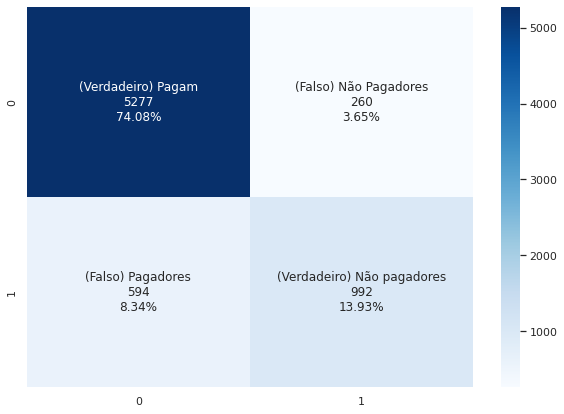

In [30]:
#Resultado da Classificação

print(classification_report(y_test, predict))
cf_matrix = confusion_matrix(y_test, predict)


plt.figure(figsize = (10,7))

group_names = ['(Verdadeiro) Pagam','(Falso) Não Pagadores','(Falso) Pagadores','(Verdadeiro) Não pagadores']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
#plt.savefig('img/confusion_matrix.png', dpi=300)

## 6.2 Balanced class with Oversampling

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      5548
           1       0.89      0.84      0.86      5604

    accuracy                           0.87     11152
   macro avg       0.87      0.87      0.87     11152
weighted avg       0.87      0.87      0.87     11152



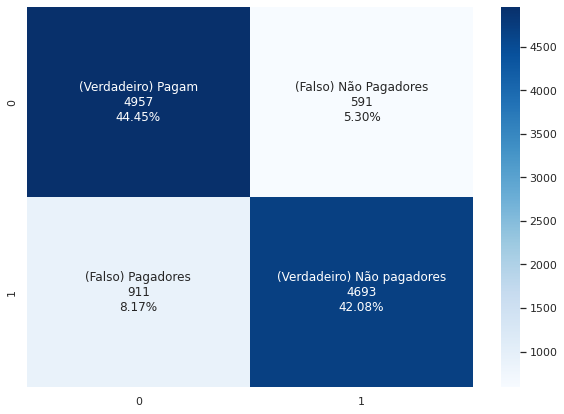

In [31]:
#Resultado da Classificação

print(classification_report(y_test_over, predict_over))
cf_matrix = confusion_matrix(y_test_over, predict_over)


plt.figure(figsize = (10,7))

group_names = ['(Verdadeiro) Pagam','(Falso) Não Pagadores','(Falso) Pagadores','(Verdadeiro) Não pagadores']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
#plt.savefig('img/confusion_matrix.png', dpi=300)

## 6.3 Balanced class with undersampling

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1526
           1       0.82      0.75      0.79      1568

    accuracy                           0.79      3094
   macro avg       0.79      0.79      0.79      3094
weighted avg       0.80      0.79      0.79      3094



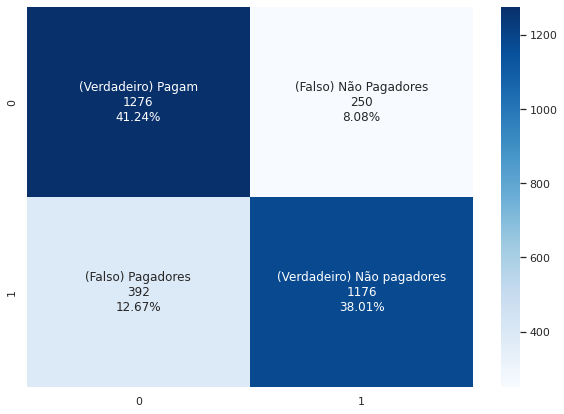

In [32]:
#Resultado da Classificação

print(classification_report(y_test_under, predict_under))
cf_matrix = confusion_matrix(y_test_under, predict_under)


plt.figure(figsize = (10,7))

group_names = ['(Verdadeiro) Pagam','(Falso) Não Pagadores','(Falso) Pagadores','(Verdadeiro) Não pagadores']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
#plt.savefig('img/confusion_matrix.png', dpi=300)

# 7. Save the models

In [33]:
with open('archive/credit.pkl', mode='wb') as f:
    pickle.dump([x_train, x_test, y_train, y_test], f)

In [34]:
with open('archive/modelNaiveBayes.pkl', mode='wb') as f:
    pickle.dump([lg], f)

# 8. Conclusion